# permutations/combinations

`n` is the number of things to choose from, and we choose `r` of them

### PERMUTATIONS (order matters)
- Repetition is Allowed: such as a lock. It could be "333". <br>
    `= n^r` <br>
    
- No Repetition: for example the first three people in a running race. You can't be first and second. <br>
    `= n!/(n − r)!` <br>

### COMBINATIONS (order doesn't matter)
- Repetition is Allowed: such as coins in your pocket (5,5,5,10,10)  <br>
    `= (r+n-1)!/(r!*(n − 1)!)` <br>

- No Repetition: such as lottery numbers (2,14,15,27,30,33)  <br>
    `= n!/(r!*(n − r)!)` <br>


In [1]:
import math
f = math.factorial
def permutation_repetition(n, r): # such as a lock, it could be "333"
    return n^r

def permutation_no_repetition(n, r): # for example the first three people in a running race. You can't be first and second.
    return f(n)/f(n-r)

def combination_repetition(n, r):  # such as coins in your pocket (5,5,5,10,10)
    return f(r+n-1)/(f(r)*f(n-1))

def combination__no_repetition(n, r):  # such as lottery numbers (2,14,15,27,30,33)
    return f(n)/(f(r)*f(n-r))

print('ans =', permutation_no_repetition(13, 3))

ans = 1716.0


## factorial

In [14]:
import math
math.factorial(200)

788657867364790503552363213932185062295135977687173263294742533244359449963403342920304284011984623904177212138919638830257642790242637105061926624952829931113462857270763317237396988943922445621451664240254033291864131227428294853277524242407573903240321257405579568660226031904170324062351700858796178922222789623703897374720000000000000000000000000000000000000000000000000

In [33]:
import numpy as np
np.float128(math.factorial(200))

7.886578673647905036e+374

In [20]:
math.log(math.factorial(200))

863.2319871924054

In [15]:
math.gamma(200)

OverflowError: math range error

In [34]:
np.float128(math.lgamma(200 + 1))

863.23198719240542687

In [35]:
np.float128(math.e) ** np.float128(math.lgamma(200 + 1))

7.8865786736471752354e+374

## permutation_no_repetition for very large numbers

In [36]:
n = 200
r = 3
math.factorial(n) / math.factorial(n-r)

7880400.0

In [39]:
n = 200
r = 3
np.rint(math.e ** (math.lgamma(n + 1) - math.lgamma(n - r + 1)))

7880400.0

In [8]:
import numpy as np
import math
# import numba 

# @numba.jit(nopython=True)
def num_permutations_no_repetition(n, r):
    return np.rint(math.e ** (math.lgamma(n + 1) - math.lgamma(n - r + 1)))

num_permutations_no_repetition(200, 3)

7880400.0

# probability plot

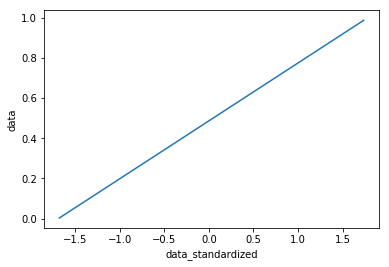

In [2]:
import numpy
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data = numpy.random.random((100,1))
data.sort(0)
data_standardized = (data - data.mean())/data.std()  # already sorted

# alternatively, can use zscore function, does the same standardization
data_standardized_zscore = stats.zscore(data)  # already sorted

df = pd.DataFrame({'data': data[:,0], 'data_standardized': data_standardized[:,0]})

%matplotlib inline
plt.close("all")
ax = sns.lineplot(x='data_standardized', y='data', data=df)
plt.show()



# norm prices

In [1]:
import pandas as pd
import numpy as np
d = {"SPY" : [86.80, 86.70, 87.28, 84.67, 85.01],
    "AAPL": [90.36, 94.18, 92.62, 90.62, 92.30],
    "HNZ" : [33.95, 33.82, 33.38, 32.59, 31.99],
    "XOM" : [74.48, 74.47, 73.26, 71.39, 85.13],
    "GLD" : [86.23, 0, 85.13, 82.75, 84.46]}

df = pd.DataFrame(d)

# .loc for label based indexing or
# .iloc for positional indexing

normed = df/df.iloc[0]
normed['AAPL'] = np.nan
normed = normed.fillna(value=0)
print(normed[0:2])

        SPY  AAPL       HNZ       XOM  GLD
0  1.000000   0.0  1.000000  1.000000  1.0
1  0.998848   0.0  0.996171  0.999866  0.0
